# Mini - Project

This Jupyter notebook contains simulation for the required assignment. (Note that the RK4 implementation is in another jupyter notebook.) This includes the 2-Body and 3-Body problem.



### 7 th  February 2023
We will attempt to simulate the two body problem with two different method and see how well each method perform by looking at the conservation of energy. The first method is the euler method and the second method is Velocity Verlet Method.

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Force Function


In [13]:
def force(r1,r2,m1,m2):
    """Force function is define to be used repeatly throughout the mini-projection 
    to calculate the force of one body on other body.
    
    Inputs:
    r1 - position of mass 1
    r2 - position of mass 2
    m1 - mass 1
    m2 - mass 2
    # G is defined outside of this function
    
    Returns:
    Force - force experienced by mass 1
    
    """
    # Find r_12 and its magnitude
    r12 = r2 - r1
    
    
    mag_r12 = np.linalg.norm(r2-r1) # np.linalg.norm helps to find the magnitude of a vector
    f_on_m1 = G*m1*m2*r12/(mag_r12**3)
    return f_on_m1

### 7 feb 2023 - Mistake solved
Error occur within the force function where I did not calculate the magnitude of the vector named mag_r12 because I was expecting abs(mag_r12) will calculate the magnitude of the vector but turns out np.linalg.norm is needed to solve the problem.
 

## Euler Method: Central Force Problem (Two body)

Using Euler method to propagate the path of a lighter mass around a much heavier mass. Euler method basically uses a truncated taylor series to obtain the next point (given a set of initial condition and equations) and iteratively extrapolating the next point. The properties of the system (such as mass, gravitational constant, etc...) is choosen to simplify the model at this stage. The mass is deliberately choosen to be a ratio of 1000 to ensure we have a central force problem where one massive body can be assume approximately to be stationary for simplicity.

In [14]:
# Set up parameters
Ndim = 2     #2D problem for now
dt = 0.01
Nsteps = 50000
G = 1       # Appropriate units
m1 = 0.0001 # Small
m2 = 1     # Large

# Set up storage for the bodies's position and velocity at each time step
r1 = np.zeros(( Nsteps ,Ndim  ))
r2 = np.zeros(( Nsteps ,Ndim  ))
v1 = np.zeros(( Nsteps ,Ndim  ))
v2 = np.zeros(( Nsteps ,Ndim  ))
# Set up storage for energies at each time step
#Energies are scalar quantity so Ndim shouldn't be included
KE = np.zeros((Nsteps))
PE = np.zeros((Nsteps))
L = np.zeros((Nsteps))

# Initial conditions
'''
Based on simple calssical mechanics, in a circular orbit the gravitational force must equal to centripetal force, 
we can solve for v1=sqrt(G*M) given r=1, M=1 , G=1 giving v1 = 1.
If we let the intial position of mass 1 be (x,y)=(0,1) as radius is one, due to the velocity being 
perpendicular to the circumference we must have only horizontal velocity component but no vertical 
velocity component v1 = (1,0) assuming mass 1 is traversing around mass 2 counter-clockwise
'''
r1[0] = np.array(( 0,1 ))
v1[0] = np.array(( 1,0 ))

### 7 february 2023 - Mistake solved
When creating arrays for KE and PE to store the upcoming calculation for KE and PE, I accidentally created a (NxNdim) which lead to the final KE and PE being a Vector quantity instead of the expected Scalar Quantity


### Propagation
Propagating the initial system forward in time using Euler method

In [15]:
for i in range(Nsteps-1):
    # Mass 2 is stationary at the origin due to assumption of central force problem and for simplicity
    r2_origin = np.array([0,0])
    # v1 at next step = v1 at this step + dt * dv/dt where dv/dt = F/m1
    v1[i+1]=v1[i] + dt*force(r1[i],r2_origin,m1,m2)/m1
    # r1 at next step = r1 at this step + dt * dr/dt where dr/dt = v
    r1[i+1]= r1[i] +dt*v1[i]
    
    
    # KE for this stationary model, only mass 1 contributes to KE
    # Creating an array to store velocity magnitude (speed)
    
    KE[i] = 0.5* (m1 *np.linalg.norm(v1[i])**2) # v[i] needs to be converted to magnitude of v[i]
    
    # U = -Gm1m2/r12 for PE
    #creating an array to store r12
    r12 = np.zeros(( Nsteps))
    r12[i] = np.linalg.norm(r2_origin -r1[i]) #calculating the magnitude of r2 -r1
    PE[i] = -G * m1 *m2 /r12[i]
    
    
    # Angular momentum
    L[i] = m1 * np.linalg.norm(np.cross(r2_origin-r1[i],v1[i]))
    # Final Total Angular momentum
    
    
# Final Case for Kinetic and Potential energy, Total Energy and Total Angular Momentum
KE[-1]= 0.5*m1*np.linalg.norm(v1[-1])
PE[-1]=  -G * m1 *m2 /(np.linalg.norm(r2[-1] -r1[-1]))
total_E = PE + KE
L[-1]= m1 * np.linalg.norm(np.cross(r2[-1]-r1[-1],v1[-1]) )

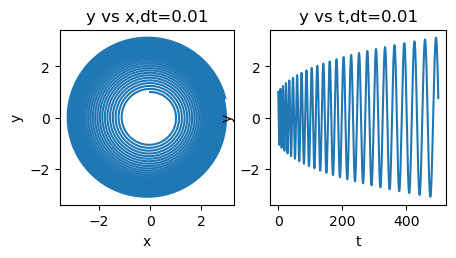

In [16]:

# Plotting orbit x vs y or x and y vs t
fig=plt.figure(figsize=(5,5))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)

# x vs y plot 
ax1.set_title('y vs x,dt=0.01')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.plot(r1[:,0],r1[:,1])
ax1.set_aspect('equal')

# y vs t plot
t=np.linspace(0,Nsteps*dt,Nsteps)
ax2.set_title('y vs t,dt=0.01')
ax2.set_xlabel('t')
ax2.set_ylabel('y')
ax2.plot(t,r1[:,1])


## Conservation of Total energy and Total momentum for Euler Method

Text(0, 0.5, 'Energy in Joules')

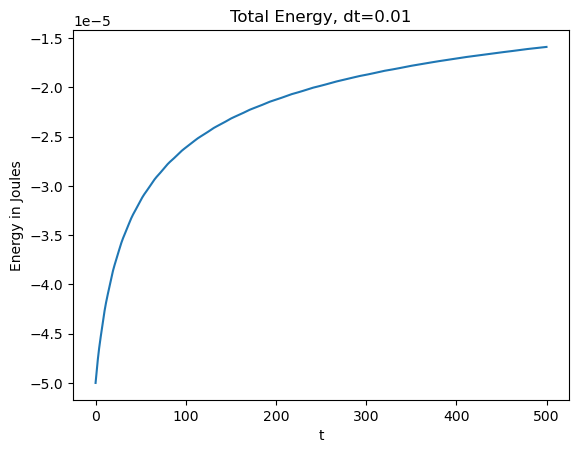

In [17]:

#Total energy vs t
plt.plot(t[:-2],total_E[:-2])
plt.title('Total Energy, dt=0.01')
plt.xlabel('t')
plt.ylabel('Energy in Joules')

### 8 th of Feburary 2023 - Error Solved
Error occur when trying to plot the total energy throughout all time. I did not include the total energy from the intial condition

Text(0, 0.5, 'L - Angular momentum in Kg.m2.s-1')

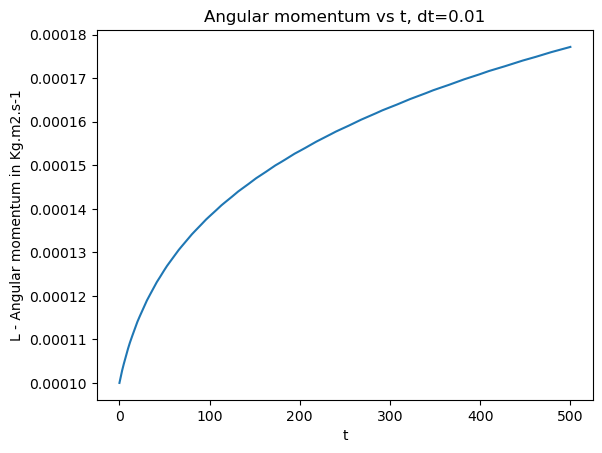

In [18]:
# Plot angular momentum vs t
plt.plot(t,L)
plt.title('Angular momentum vs t, dt=0.01')
plt.xlabel('t')
plt.ylabel('L - Angular momentum in Kg.m2.s-1')

### Discussion of Euler method 
As time process, the plots of total angular momentum and energy against time have shown that the euler method does not obey conservation laws which means it is not stable for long duration of simulation. The size of dt also play an important role in the accuracy of the propagated path. In particular, the smaller the size of dt is, the less fluctuation in total energy and total angular momentum which becomes increasing realistic as a physical system as the conservation laws are obeyed. But the cost of decreasing dt is a heavier computational power, more steps is required to propagate the same distance when comparing to a higher dt.




## 23 of March 2023
Trying to test out the affect of reducing dt

In [19]:
# Set up parameters
Ndim = 2     #2D problem for now
dt = np.array([0.01,0.005,0.0025,0.001])
Nsteps = 50000
G = 1       # Appropriate units
m1 = 0.0001 # Small
m2 = 1     # Large

# Set up storage for the bodies's position and velocity at each time step
r1 = np.zeros(( Nsteps ,Ndim  ))
r2 = np.zeros(( Nsteps ,Ndim  ))
v1 = np.zeros(( Nsteps ,Ndim  ))
v2 = np.zeros(( Nsteps ,Ndim  ))
# Set up storage for energies at each time step
#Energies are scalar quantity so Ndim shouldn't be included
KE = np.zeros((Nsteps))
PE = np.zeros((Nsteps))
L = np.zeros((Nsteps))

# Initial conditions
'''
Based on simple calssical mechanics, in a circular orbit the gravitational force must equal to centripetal force, 
we can solve for v1=sqrt(G*M) given r=1, M=1 , G=1 giving v1 = 1.
If we let the intial position of mass 1 be (x,y)=(0,1) as radius is one, due to the velocity being 
perpendicular to the circumference we must have only horizontal velocity component but no vertical 
velocity component v1 = (1,0) assuming mass 1 is traversing around mass 2 counter-clockwise
'''
r1[0] = np.array(( 0,1 ))
v1[0] = np.array(( 1,0 ))

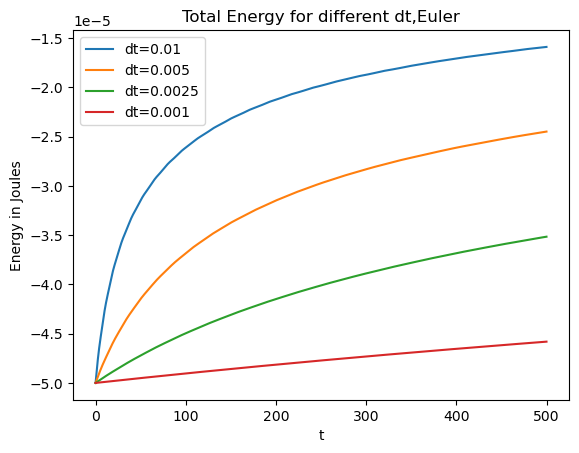

In [20]:
for j in range(len(dt)):
    for i in range(Nsteps-1):
        # Mass 2 is stationary at the origin due to assumption of central force problem and for simplicity
        r2_origin = np.array([0,0])
        # v1 at next step = v1 at this step + dt * dv/dt where dv/dt = F/m1
        v1[i+1]=v1[i] + dt[j]*force(r1[i],r2_origin,m1,m2)/m1
        # r1 at next step = r1 at this step + dt * dr/dt where dr/dt = v
        r1[i+1]= r1[i] +dt[j]*v1[i]
    
    
        # KE for this stationary model, only mass 1 contributes to KE
        # Creating an array to store velocity magnitude (speed)
    
        KE[i] = 0.5* (m1 *np.linalg.norm(v1[i])**2) # v[i] needs to be converted to magnitude of v[i]
    
        # U = -Gm1m2/r12 for PE
        #creating an array to store r12
        r12 = np.zeros(( Nsteps))
        r12[i] = np.linalg.norm(r2_origin -r1[i]) #calculating the magnitude of r2 -r1
        PE[i] = -G * m1 *m2 /r12[i]
    
    
        # Angular momentum
        L[i] = m1 * np.linalg.norm(np.cross(r2_origin-r1[i],v1[i]))
        # Final Total Angular momentum
    
    
    # Final Case for Kinetic and Potential energy, Total Energy and Total Angular Momentum
    KE[-1]= 0.5*m1*np.linalg.norm(v1[-1])
    PE[-1]=  -G * m1 *m2 /(np.linalg.norm(r2[-1] -r1[-1]))
    total_E = PE + KE
    L[-1]= m1 * np.linalg.norm(np.cross((r2[-1] -r1[-1]),v1[-1])) 
    
    plt.plot(t[:-2],total_E[:-2], label= f'dt={dt[j]}')
    plt.title('Total Energy for different dt,Euler')
    plt.xlabel('t')
    plt.ylabel('Energy in Joules')
    plt.legend()

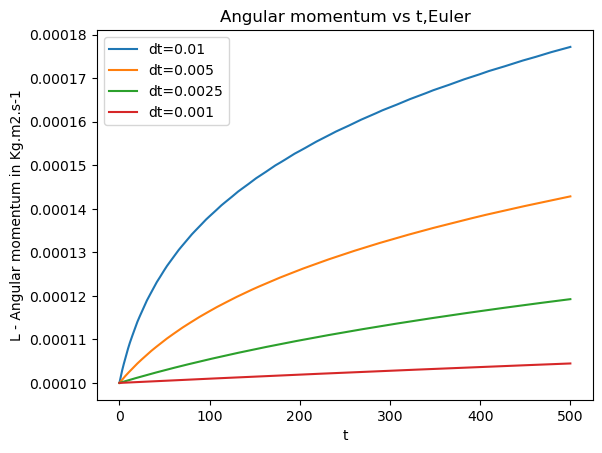

In [21]:
for j in range(len(dt)):
    for i in range(Nsteps-1):
        # Mass 2 is stationary at the origin due to assumption of central force problem and for simplicity
        r2_origin = np.array([0,0])
        # v1 at next step = v1 at this step + dt * dv/dt where dv/dt = F/m1
        v1[i+1]=v1[i] + dt[j]*force(r1[i],r2_origin,m1,m2)/m1
        # r1 at next step = r1 at this step + dt * dr/dt where dr/dt = v
        r1[i+1]= r1[i] +dt[j]*v1[i]
    
    
        # KE for this stationary model, only mass 1 contributes to KE
        # Creating an array to store velocity magnitude (speed)
    
        KE[i] = 0.5* (m1 *np.linalg.norm(v1[i])**2) # v[i] needs to be converted to magnitude of v[i]
    
        # U = -Gm1m2/r12 for PE
        #creating an array to store r12
        r12 = np.zeros(( Nsteps))
        r12[i] = np.linalg.norm(r2_origin -r1[i]) #calculating the magnitude of r2 -r1
        PE[i] = -G * m1 *m2 /r12[i]
    
    
        # Angular momentum
        L[i] = m1 * np.linalg.norm(np.cross((r2_origin-r1[i]),v1[i]))
        # Final Total Angular momentum
    
    
    # Final Case for Kinetic and Potential energy, Total Energy and Total Angular Momentum
    KE[-1]= 0.5*m1*np.linalg.norm(v1[-1])
    PE[-1]=  -G * m1 *m2 /(np.linalg.norm(r2[-1] -r1[-1]))
    total_E = PE + KE
    L[-1]= m1 * np.linalg.norm(np.cross((r2_origin-r1[-1]),v1[-1]))
    
    plt.plot(t,L,label=f'dt={dt[j]}')
    plt.title('Angular momentum vs t,Euler')
    plt.xlabel('t')
    plt.ylabel('L - Angular momentum in Kg.m2.s-1')
    plt.legend()

## Two bodies Problem with similar masses
In this section, we will consider two bodies with similar masses moving about their centre of mass. We will be using the Velocity Verlet method to propagate the initial setup which is set such that both of the masses follow a circular orbit. Velocit Verlet method is a numerical method used integrate Newton's equation of motion and has certain advantages when it comes to simulating physical system which are time reversibility and obeys the conservation laws at no significant computational power compared to euler method (such as reducing the size of dt).


In [22]:
# Set up number of steps, masses, timestep again (use new variable names)
Ndim = 2     #2D problem for now
dt = 0.001
N = 10000
G = 1       # Appropriate units
m1_v =0.5 # Small
m2_v = 1 # Large

# Storage for positions, velocities etc (again, use new names)
r1_v = np.zeros(( N ,Ndim  ))
r2_v = np.zeros(( N ,Ndim  ))
v1_v = np.zeros(( N ,Ndim  ))
v2_v = np.zeros(( N ,Ndim  ))

#Storage for KE, PE , Angular momentum L
KE_v= np.zeros(N )
PE_v= np.zeros(N)
L_v= np.zeros(N)

# Initial conditions
'''By setting the centre of mass at the origin and aligning the two body along the x-axis (x1+x2=1), we 
can obtain x1= m2/(m2+m1) and x2 = m1/(m1+m2). Using the fact that centripetal force equal to gravitational 
force, we can obtain veloity magnitude v1 = sqrt( G m2 ^2/(m2+m1)) and v2 = sqrt( G m1 ^2/(m2+m1))
which is valid as m2 >m1. The sign of v1 and v2 gives two different possible paths '''
x1_i= m2_v/(m2_v+m1_v)
x2_i= m1_v/(m1_v+m2_v)
v1_i= np.sqrt(abs(m2_v**2/(m1_v+m2_v)))
v2_i= np.sqrt(abs(m1_v**2/(m1_v+m2_v)))

'''At the initial position both body only have vertical velocity component as velocity must be tangential to the
point of path'''
r1_v[0]=np.array([-x1_i,0])
r2_v[0]=np.array([x2_i,0])
v1_v[0]=np.array([0,-v1_i])
v2_v[0]=np.array([0,v2_i])

### Propagation using Velocity Verlet Method

In [23]:
for i in range(N-1):
    
    #updating position using velocity Verlet
    r1_v[i+1]=r1_v[i] + (dt*v1_v[i]) + (dt**2) *(force(r1_v[i],r2_v[i],m1_v,m2_v)/(2*m1_v))
    r2_v[i+1]=r2_v[i] + (dt*v2_v[i]) + (dt**2) *(force(r2_v[i],r1_v[i],m2_v,m1_v)/(2*m2_v))
    
    #updating velocity using velocity Verlet
    v1_v[i+1]=v1_v[i] + dt*( (force(r1_v[i],r2_v[i],m1_v,m2_v) + force(r1_v[i+1],r2_v[i+1],m1_v,m2_v))/(2*m1_v))
    v2_v[i+1]=v2_v[i] + dt*( (force(r2_v[i],r1_v[i],m2_v,m1_v) + force(r2_v[i+1],r1_v[i+1],m2_v,m1_v))/(2*m2_v))
    
    #Updating KE
    KE_v[i+1]= 0.5 * (m1_v*np.linalg.norm(v1_v[i])**2) + 0.5 * (m2_v*np.linalg.norm(v2_v[i])**2)
    

    
    # U = -Gm1m2/r12 for PE
    #creating an array to store r12
    r12_v = np.zeros(N)
    r12_v[i] = np.linalg.norm(r2_v[i] - r1_v[i]) #calculating the magnitude of r2 -r1
    PE_v[i] = -G * m1_v *m2_v /np.linalg.norm(r2_v[i] - r1_v[i])
    
    # Angular momentum
    L_v[i] = (m1_v *np.linalg.norm(np.cross((r2_v[i] - r1_v[i]),v1_v[i])) 
            + m2_v *np.linalg.norm(np.cross((r1_v[i] - r2_v[i]),v2_v[i])))
    
# Final Case for Kinetic and Potential energy, Total Energy and Total Angular Momentum
L_v[-1] = (m1_v *np.linalg.norm(np.cross((r2_v[-1] - r1_v[-1]),v1_v[-1])) 
            + m2_v *np.linalg.norm(np.cross((r1_v[-1] - r2_v[-1]),v2_v[-1])))

KE_v[-1]=  0.5 * (m1_v*np.linalg.norm(v1_v[-1])**2) + 0.5 * (m2_v*np.linalg.norm(v2_v[-1])**2)
PE_v[-1] = -G * m1_v *m2_v /(np.linalg.norm(r2_v[-1] - r1_v[-1]))
Total_E_v=KE_v+ PE_v



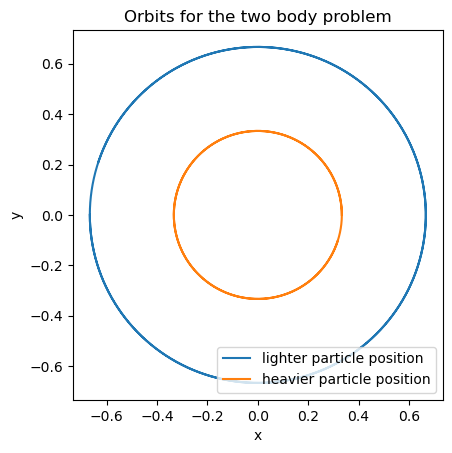

In [24]:
#Plotting the particle's paths and velocity 
plt.plot(r1_v[:,0],r1_v[:,1],label='lighter particle position')
plt.plot(r2_v[:,0],r2_v[:,1],label='heavier particle position')
plt.title('Orbits for the two body problem')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.gca().set_aspect(1)


Text(0, 0.5, 'Energy in Joules')

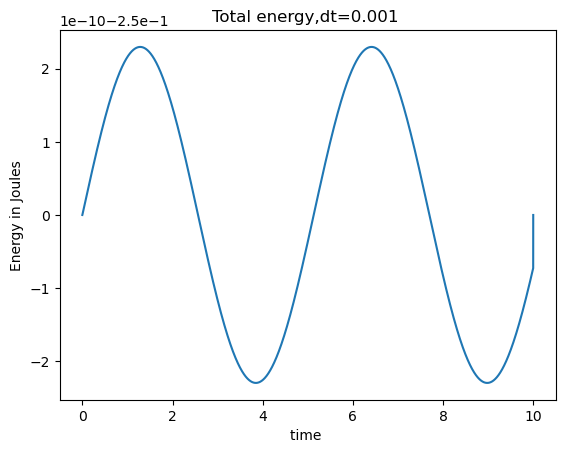

In [25]:
%matplotlib inline
# initial case for Kinetic and Potential Energy 
KE_v[0]=  0.5 * (m1_v*np.linalg.norm(v1_v[0])**2) + 0.5 * (m2_v*np.linalg.norm(v2_v[0])**2)
PE_v[0] = -G * m1_v *m2_v /(np.linalg.norm(r2_v[0] - r1_v[0]))

Total_E_v= KE_v+PE_v

time_v= np.linspace(0,N*dt,N)

plt.plot(time_v,Total_E_v)
plt.title('Total energy,dt=0.001 ')
plt.xlabel('time ') 
plt.ylabel('Energy in Joules') #didnt put unit as G is assumed to be 1

Text(0, 0.5, 'Total angular momentum in Kg.m2.s-1')

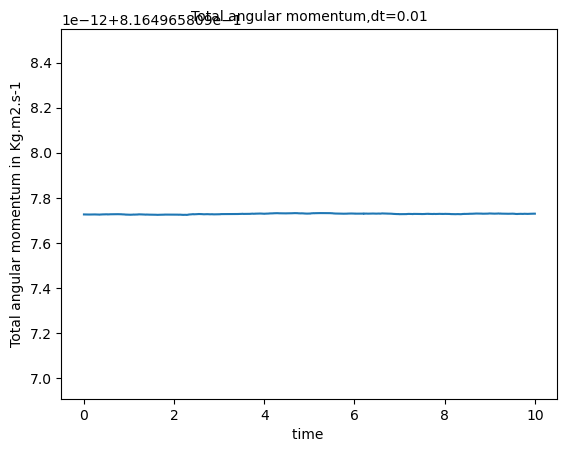

In [26]:
%matplotlib inline
  

plt.plot(time_v,L_v)
plt.title('Total angular momentum,dt=0.01',size='10')
plt.xlabel('time ') 
plt.ylabel('Total angular momentum in Kg.m2.s-1') #didnt put unit as G is assumed to be 1

### Conclusion
The orbits agrees with the theory as the heavier particle will be closer to the centre of mass which is as shown in the plot. The fluctuation of total energy is in the order of -5 and total angular momentum is in orde rof -10 which proofs that this velocity Verlet method is very effective at propagating the physical system forward in time and still obeying the conservation laws. For the same size of dt, the Velocity Verlet method obeys the conservation laws much more better than the Euler method for the same computational power.

## 23 of March 2023
Trying to test out the affect of reducing dt

In [27]:
# Set up number of steps, masses, timestep again (use new variable names)
Ndim = 2     #2D problem for now
dt = np.array([0.01,0.005,0.0025,0.001])
N = 10000
G = 1       # Appropriate units
m1_v =0.5 # Small
m2_v = 1 # Large

# Storage for positions, velocities etc (again, use new names)
r1_v = np.zeros(( N ,Ndim  ))
r2_v = np.zeros(( N ,Ndim  ))
v1_v = np.zeros(( N ,Ndim  ))
v2_v = np.zeros(( N ,Ndim  ))

#Storage for KE, PE , Angular momentum L
KE_v= np.zeros(N )
PE_v= np.zeros(N)
L_v= np.zeros(N)

# Initial conditions
'''By setting the centre of mass at the origin and aligning the two body along the x-axis (x1+x2=1), we 
can obtain x1= m2/(m2+m1) and x2 = m1/(m1+m2). Using the fact that centripetal force equal to gravitational 
force, we can obtain veloity magnitude v1 = sqrt( G m2 ^2/(m2+m1)) and v2 = sqrt( G m1 ^2/(m2+m1))
which is valid as m2 >m1. The sign of v1 and v2 gives two different possible paths '''
x1_i= m2_v/(m2_v+m1_v)
x2_i= m1_v/(m1_v+m2_v)
v1_i= np.sqrt(abs(m2_v**2/(m1_v+m2_v)))
v2_i= np.sqrt(abs(m1_v**2/(m1_v+m2_v)))

'''At the initial position both body only have vertical velocity component as velocity must be tangential to the
point of path'''
r1_v[0]=np.array([-x1_i,0])
r2_v[0]=np.array([x2_i,0])
v1_v[0]=np.array([0,-v1_i])
v2_v[0]=np.array([0,v2_i])

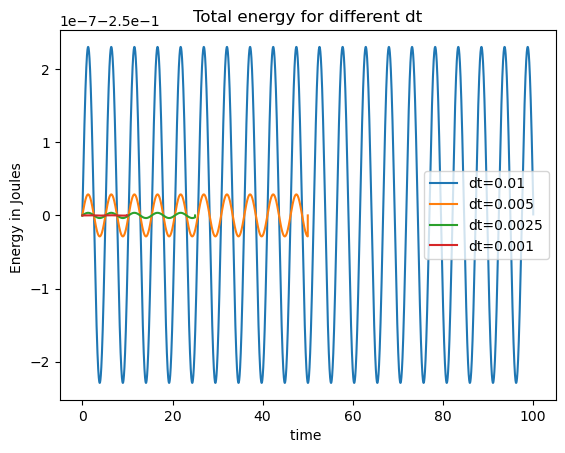

In [28]:
for j in range(len(dt)):
    
    for i in range(N-1):
    
        #updating position using velocity Verlet
        r1_v[i+1]=r1_v[i] + (dt[j]*v1_v[i]) + (dt[j]**2) *(force(r1_v[i],r2_v[i],m1_v,m2_v)/(2*m1_v))
        r2_v[i+1]=r2_v[i] + (dt[j]*v2_v[i]) + (dt[j]**2) *(force(r2_v[i],r1_v[i],m2_v,m1_v)/(2*m2_v))
    
        #updating velocity using velocity Verlet
        v1_v[i+1]=v1_v[i] + dt[j]*( (force(r1_v[i],r2_v[i],m1_v,m2_v) + force(r1_v[i+1],r2_v[i+1],m1_v,m2_v))/(2*m1_v))
        v2_v[i+1]=v2_v[i] + dt[j]*( (force(r2_v[i],r1_v[i],m2_v,m1_v) + force(r2_v[i+1],r1_v[i+1],m2_v,m1_v))/(2*m2_v))
    
        #Updating KE
        KE_v[i+1]= 0.5 * (m1_v*np.linalg.norm(v1_v[i])**2) + 0.5 * (m2_v*np.linalg.norm(v2_v[i])**2)
    

    
        # U = -Gm1m2/r12 for PE
        #creating an array to store r12
        r12_v = np.zeros(N)
        r12_v[i] = np.linalg.norm(r2_v[i] - r1_v[i]) #calculating the magnitude of r2 -r1
        PE_v[i] = -G * m1_v *m2_v /np.linalg.norm(r2_v[i] - r1_v[i])
    
        # Angular momentum
        L_v[i] = (m1_v* np.linalg.norm(np.cross((r2_v[i] - r1_v[i]),v1_v[i]))
                + m2_v *np.linalg.norm(np.cross((r1_v[i] - r2_v[i]),v2_v[i])))
    
    # Final Case for Kinetic and Potential energy, Total Energy and Total Angular Momentum
    L_v[-1] = (m1_v* np.linalg.norm(np.cross((r2_v[-1] - r1_v[-1]),v1_v[-1]))
                + m2_v *np.linalg.norm(np.cross((r1_v[-1] - r2_v[-1]),v2_v[-1])))
    KE_v[-1]=  0.5 * (m1_v*np.linalg.norm(v1_v[-1])**2) + 0.5 * (m2_v*np.linalg.norm(v2_v[-1])**2)
    PE_v[-1] = -G * m1_v *m2_v /(np.linalg.norm(r2_v[-1] - r1_v[-1]))
    Total_E_v=KE_v+ PE_v
    
    # initial case for Kinetic and Potential Energy 
    KE_v[0]=  0.5 * (m1_v*np.linalg.norm(v1_v[0])**2) + 0.5 * (m2_v*np.linalg.norm(v2_v[0])**2)
    PE_v[0] = -G * m1_v *m2_v /(np.linalg.norm(r2_v[0] - r1_v[0]))

    Total_E_v= KE_v+PE_v

    time_v= np.linspace(0,N*dt[j],N)
    naming= (f'dt={dt[j]}')
    plt.plot(time_v,Total_E_v,label=naming)
    plt.title('Total energy for different dt')
    plt.xlabel('time ') 
    plt.ylabel('Energy in Joules ') #didnt put unit as G is assumed to be 1
    plt.legend()

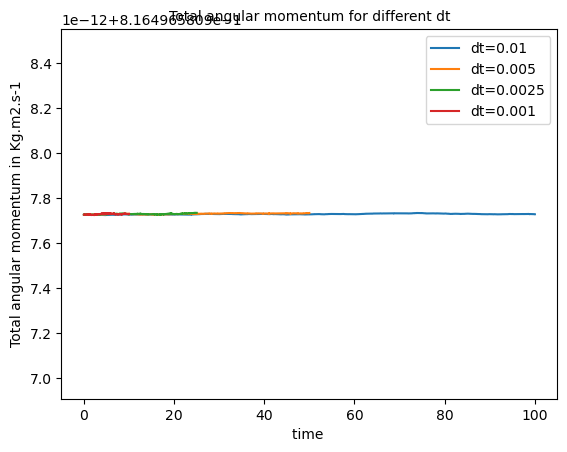

In [29]:
for j in range(len(dt)):
    
    for i in range(N-1):
    
        #updating position using velocity Verlet
        r1_v[i+1]=r1_v[i] + (dt[j]*v1_v[i]) + (dt[j]**2) *(force(r1_v[i],r2_v[i],m1_v,m2_v)/(2*m1_v))
        r2_v[i+1]=r2_v[i] + (dt[j]*v2_v[i]) + (dt[j]**2) *(force(r2_v[i],r1_v[i],m2_v,m1_v)/(2*m2_v))
    
        #updating velocity using velocity Verlet
        v1_v[i+1]=v1_v[i] + dt[j]*( (force(r1_v[i],r2_v[i],m1_v,m2_v) + force(r1_v[i+1],r2_v[i+1],m1_v,m2_v))/(2*m1_v))
        v2_v[i+1]=v2_v[i] + dt[j]*( (force(r2_v[i],r1_v[i],m2_v,m1_v) + force(r2_v[i+1],r1_v[i+1],m2_v,m1_v))/(2*m2_v))
    
        #Updating KE
        KE_v[i+1]= 0.5 * (m1_v*np.linalg.norm(v1_v[i])**2) + 0.5 * (m2_v*np.linalg.norm(v2_v[i])**2)
    

    
        # U = -Gm1m2/r12 for PE
        #creating an array to store r12
        r12_v = np.zeros(N)
        r12_v[i] = np.linalg.norm(r2_v[i] - r1_v[i]) #calculating the magnitude of r2 -r1
        PE_v[i] = -G * m1_v *m2_v /np.linalg.norm(r2_v[i] - r1_v[i])
    
        # Angular momentum
        L_v[i] = (m1_v* np.linalg.norm(np.cross((r2_v[i] - r1_v[i]),v1_v[i]))
                + m2_v *np.linalg.norm(np.cross((r1_v[i] - r2_v[i]),v2_v[i])))
        
    # Final Case for Kinetic and Potential energy, Total Energy and Total Angular Momentum
    L_v[-1] = (m1_v* np.linalg.norm(np.cross((r2_v[-1] - r1_v[-1]),v1_v[-1]))
                + m2_v *np.linalg.norm(np.cross((r1_v[-1] - r2_v[-1]),v2_v[-1])))
    KE_v[-1]=  0.5 * (m1_v*np.linalg.norm(v1_v[-1])**2) + 0.5 * (m2_v*np.linalg.norm(v2_v[-1])**2)
    PE_v[-1] = -G * m1_v *m2_v /(np.linalg.norm(r2_v[-1] - r1_v[-1]))
    Total_E_v=KE_v+ PE_v
    
    # initial case for Kinetic and Potential Energy 
    KE_v[0]=  0.5 * (m1_v*np.linalg.norm(v1_v[0])**2) + 0.5 * (m2_v*np.linalg.norm(v2_v[0])**2)
    PE_v[0] = -G * m1_v *m2_v /(np.linalg.norm(r2_v[0] - r1_v[0]))

    Total_E_v= KE_v+PE_v

    time_v= np.linspace(0,N*dt[j],N)
    naming= (f'dt={dt[j]}')
    plt.plot(time_v,L_v,label=naming)
    plt.title('Total angular momentum for different dt',size='10')
    plt.xlabel('time ') 
    plt.ylabel('Total angular momentum in Kg.m2.s-1') #didnt put unit as G is assumed to be 1
    plt.legend()

### 21th of February
# Three Body Problem
In this section we will consider a simplied three body problem where we place a massive object at the origin (assuming it remains stationary) and the second object orbiting the stationary massive object while a third lightest object orbiting around the second object. We initially place the object along the positive axis and work out the velocity of the second and third object using simple mechanics.


In [30]:
# set up the constant for the problem
Ndim = 2     #2D problem 
dt = 0.001
N = 10000    #number of steps
G = 1       # Appropriate units
m1 = 1          # Largest mass 1
m2 = 3*10**-6   # mass 2
m3 = 3.6*10**-8 # lightest mass 3

#Storage for positions, velocities etc 
r1 = np.zeros(( N ,Ndim  ))
r2 = np.zeros(( N ,Ndim  ))
r3 = np.zeros(( N ,Ndim  ))

v1 = np.zeros(( N ,Ndim  ))
v2 = np.zeros(( N ,Ndim  ))
v3 = np.zeros(( N ,Ndim  ))


#Storage for KE, PE , Angular momentum L
KE_3= np.zeros(N)
PE_3= np.zeros(N)
L_3 = np.zeros(N)

#Assuming the largest mass is stationary similar to the two body central force problem
v1[0] = (0,0) 

# Initial position of the three body is align along the positive x-axis with m1 at the origin
r1[0]=np.array([0,0])    
r2[0]=np.array([1,0])
r3[0]=np.array([1.0025,0])

'''Finding the initial velocity of mass 2 via centripetal force and ignoring the influence of m3
'''
v2[0]=np.array([0,np.sqrt(G*m1)])

'''Finding the initial velocity of mass 3 via centripetal force and ignoring the influence of m1 
then taking the vector sum of v3 + v2 
'''
v3[0]= np.array([0,np.sqrt( (G*m2/0.0025))]) +v2[0]


In [31]:
'''updating the position of mass 2 and 3 using velocity Verlet as we assume
that mass 1 is fixed so we do not need to update the position and velocity of mass 1
'''

for i in range(N-1):
    #updating position using velocity Verlet 
    r2[i+1] = r2[i] + dt*(v2[i]) + (dt**2)*(force(r2[i],r1[i],m2,m1)+force(r2[i],r3[i],m2,m3))/(2*m2)
    r3[i+1] = r3[i] + dt*(v3[i]) + (dt**2)*(force(r3[i],r2[i],m3,m2)+force(r3[i],r1[i],m3,m1))/(2*m3)
    
    #updating velocity using velocity Verlet
    v2[i+1] = v2[i] + dt*((force(r2[i],r1[i],m2,m1)+force(r2[i],r3[i],m2,m3)+ force(r2[i+1],r1[i+1],m2,m1)+force(r2[i+1],r3[i+1],m2,m3))/(2*m2))
    v3[i+1] = v3[i] + dt*((force(r3[i],r2[i],m3,m2)+force(r3[i],r1[i],m3,m1)+ force(r3[i+1],r2[i+1],m3,m2)+force(r3[i+1],r1[i+1],m3,m1))/(2*m3)) 

    

    
    

    #Updating KE
    KE_3[i]= 0.5 * (m2*np.linalg.norm(v2[i])**2) + 0.5 * (m3*np.linalg.norm(v3[i])**2)
    

    
    # U = -Gm1m2/r12 for PE
    #creating an array to store r12
    r12 = np.zeros(N)
    r23 = np.zeros(N)
    r13 = np.zeros(N)
    r12[i] = np.linalg.norm(r2[i] - r1[i]) #calculating the magnitude of r2 - r1
    r13[i] = np.linalg.norm(r3[i] - r1[i]) #calculating the magnitude of r3 - r1
    r23[i] = np.linalg.norm(r3[i] - r2[i]) #calculating the magnitude of r3 - r2
  
    PE_3[i] = (-G * m1 *m2 /r12[i] ) + (-G * m2 *m3 /r23[i] )+ (-G * m1 *m3 /r13[i] ) 
    
    # Angular momentum
    L_3[i] = (m2 *  np.linalg.norm(np.cross((r2[i] - r1[i]),v2[i]))
            + m3 *np.linalg.norm(np.cross((r3[i] - r2[i]),v3[i])))
    
    
# Final Case for Kinetic and Potential energy, Total Energy and Total Angular Momentum
KE_3[-1]= 0.5 * (m2*np.linalg.norm(v2[-1])**2) + 0.5 * (m3*np.linalg.norm(v3[-1])**2)
PE_3[-1] = (-G * m1 *m2 /(np.linalg.norm(r2[-1] - r1[-1])))+  + (-G * m2 *m3 /(np.linalg.norm(r3[-1] - r2[-1]))) +(-G * m1 *m3 /(np.linalg.norm(r3[-1] - r1[-1]))) 

Total_E_3=KE_3+ PE_3
L_3[-1] = (m2 *  np.linalg.norm(np.cross((r2[-1] - r1[i]),v2[-1]))
            + m3 *np.linalg.norm(np.cross((r3[-1] - r2[i]),v3[-1])))
    

[ 1.          0.9999995   0.99999801 ... -0.84962056 -0.8490912
 -0.84856101]
[ 1.0025      1.00249926  1.00249705 ... -0.84950247 -0.84893757
 -0.84837186]


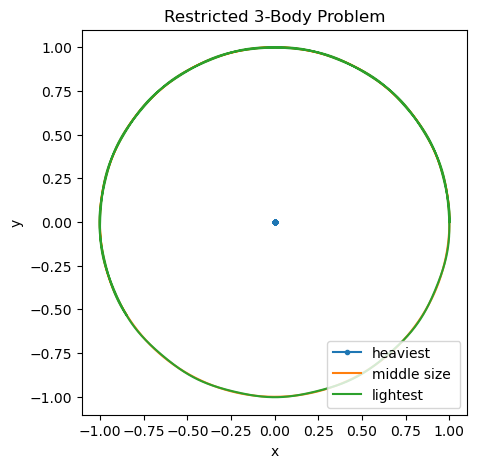

In [32]:
#Plotting the particle's paths and velocity 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.plot(r1[:,0],r1[:,1],label='heaviest',marker='.')
ax.plot(r2[:,0],r2[:,1],label='middle size ')
ax.plot(r3[:,0],r3[:,1],label='lightest')
ax.set_title('Restricted 3-Body Problem')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend()
print(r2[:,0])
print(r3[:,0])
plt.gca().set_aspect(1)

### Problem Occur 6 March
After Plotting the graph of all the orbits, I realised that the two lighter objects are indistinguishable so I was doubting my solution to the simplified 3 bodies problem. I have solved my problem by plotting the relative position of the lightest mass relative to the second mass to ensure that the lightest mass is orbiting the second mass ciruclarly.

## Plotting the relative displacement of the moon relative to the earth
By plotting the graph below, we observe a sinusoidal pattern within a small section of the whole timescale which emphasises that our lightest mass is orbiting around the second heavier mass. 

Text(0.5, 1.0, 'Relative motion of the third object relative to the second object')

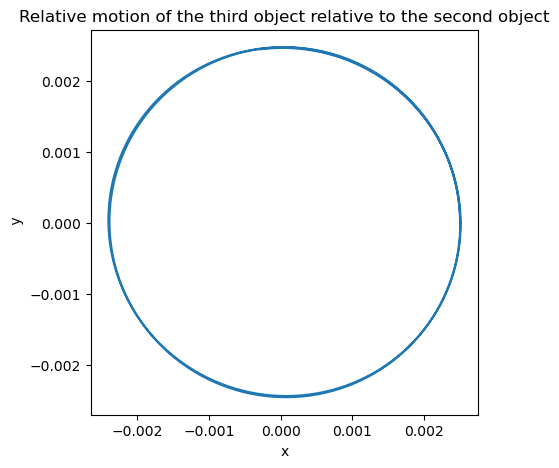

In [33]:
time= dt*np.linspace(0,dt*N,N)
fig=plt.figure(figsize=(5,5))
ax1=fig.add_subplot(111)
ax1.plot(r3[:1000,0]-r2[:1000,0],r3[:1000,1]-r2[:1000,1])
ax1.set_xlabel('x')
ax1.set_ylabel(' y')
ax1.set_title('Relative motion of the third object relative to the second object')

10000
10000
[-1.51668475e-06 -1.51668475e-06 -1.51668475e-06 ... -1.51668475e-06
 -1.51668475e-06 -1.51668475e-06]


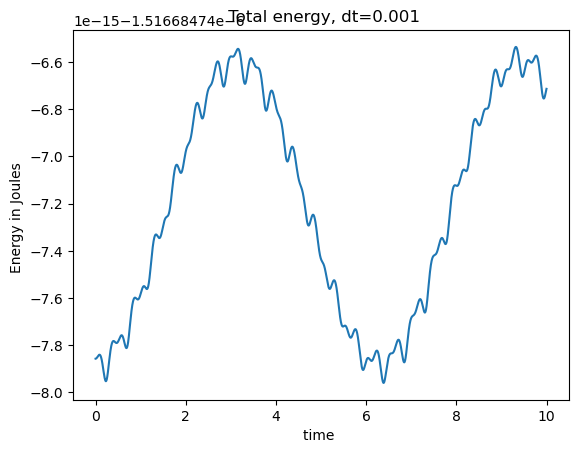

In [34]:
time_v= dt*np.arange(0,N)
print(len(time_v))

print(len(Total_E_3))

plt.plot(time_v,Total_E_3)
plt.title(' Total energy, dt=0.001')
plt.xlabel('time ') 
plt.ylabel('Energy in Joules ') #didnt put unit as G is assumed to be 1
print(Total_E_3)

Text(0, 0.5, 'Total angular momentum in Kg.m2.s-1')

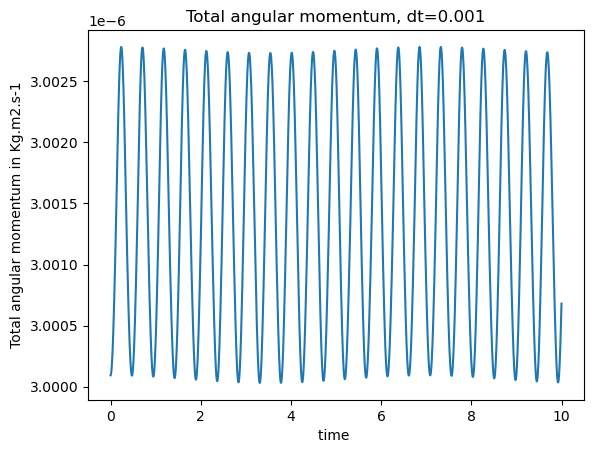

In [35]:
%matplotlib inline

plt.plot(time_v[0:-2],L_3[0:-2])
plt.title('Total angular momentum, dt=0.001')
plt.xlabel('time ') 
plt.ylabel('Total angular momentum in Kg.m2.s-1') #didnt put unit as G is assumed to be 1

### 10th of March 2023 - Problem
A sudden spike in total angular momentum at the last time step

### Discussion on simplified 3 bodies problem
Using the Velocity Verlet integrator, we are able to show that the simulated physical system consistently obeys conservation laws to orders of -11 and -13 for total angular momentum and total energy of the system respectively. This is further backed up by the fact that the fluctuation does not increases with time which shows that this simulation is realiable.

## Improvement on the simplified 3 bodies problem
In this section, we will attempt to improve our crude solution to the simplified 3 bodies problem by introducing the idea of centre of mass which tries to avoid the assumption of neglecting the present of the other mass.

## Code not producing the ideal result expected on 7 of march for the more accurate 3 bodies problem
Since I have previously simulated the 3 body problem (using a less accurate way), I have decided to move on to the extension. The simulated 3 body problem is not stable at all.


In [25]:
m2 = 3*10**-6   # mass 2
m3 = 3.6*10**-8 # lightest mass 3

m1_v = m2 + m3 # centre of mass of the second and third smaller masses
m2_v = 1 # massive object

# Storage for positions, velocities 
# r1_v - centre of mass for the second and third masses
# r2_v - position of the massive object

r1_v = np.zeros(( N ,Ndim  ))
Obj_1_r= np.zeros(( N ,Ndim  ))

v1_v = np.zeros(( N ,Ndim  ))
Obj_1_v = np.zeros(( N ,Ndim  ))


# Initial condition explanations
''' By setting the centre of mass at the origin and aligning the first object and the combined centre of mass of the 
second and third mass along the x-axis and set the distance between them to be 1 such that we obtain the first equation
(x1-x2=1), we can then obtain x1=m2/ (m2+m1) and x2=m1/(m1+m2) using the centre of mass equation along with the constraint
that the two objects are distance 1 away from each other. For the objects to be in a circular path, the centripetal
force must equal to gravitational force, we can by using this equation derive the magntiude of the initial velocities of 
the two object v1= sqrt(G *m2 ^2 / (m2+m1)) and v2 = sqrt( G m1 ^2/(m2+m1)).
'''
x1_i= m2_v/(m2_v+m1_v)
x2_i= m1_v/(m1_v+m2_v)
v1_i= np.sqrt(abs(m2_v**2/(m1_v+m2_v)))
v2_i= np.sqrt(abs(m1_v**2/(m1_v+m2_v)))

'''At the initial position both body only have vertical velocity component as velocity must be tangential to the
point of path'''
r1_v[0]=np.array([-x1_i,0])
v1_v[0]=np.array([0,-v1_i])

Obj_1_r[0]=np.array([x2_i,0])
Obj_1_v[0]=np.array([0,v2_i])



##  6 th of March 2023 - Misunderstanding 
I was trying to first orbit of the centre of mass and the massive first object then assuming that I can just add some relative vector to the Centre of mass point to produce the path of the second and third object. Turn out I just need the idea of centre of mass to work out the initial condition then I just need to use the Velocity Verlet to propagate the system forward in time. I have highlighted the code I have written which is unneccessary for the third bodies problem but left it for a record.

In [26]:
''' 
# Propagate using Velocity Verlet Integrator

for i in range(N-1):
    
    #updating position using velocity Verlet
    r1_v[i+1]=r1_v[i] + (dt*v1_v[i]) + (dt**2) *(force(r1_v[i],r2_v[i],m1_v,m2_v)/(2*m1_v))
    r2_v[i+1]=r2_v[i] + (dt*v2_v[i]) + (dt**2) *(force(r2_v[i],r1_v[i],m2_v,m1_v)/(2*m2_v))
    
    #updating velocity using velocity Verlet
    v1_v[i+1]=v1_v[i] + dt*( (force(r1_v[i],r2_v[i],m1_v,m2_v) + force(r1_v[i+1],r2_v[i+1],m1_v,m2_v))/(2*m1_v))
    v2_v[i+1]=v2_v[i] + dt*( (force(r2_v[i],r1_v[i],m2_v,m1_v) + force(r2_v[i+1],r1_v[i+1],m2_v,m1_v))/(2*m2_v))
'''  

' \n# Propagate using Velocity Verlet Integrator\n\nfor i in range(N-1):\n    \n    #updating position using velocity Verlet\n    r1_v[i+1]=r1_v[i] + (dt*v1_v[i]) + (dt**2) *(force(r1_v[i],r2_v[i],m1_v,m2_v)/(2*m1_v))\n    r2_v[i+1]=r2_v[i] + (dt*v2_v[i]) + (dt**2) *(force(r2_v[i],r1_v[i],m2_v,m1_v)/(2*m2_v))\n    \n    #updating velocity using velocity Verlet\n    v1_v[i+1]=v1_v[i] + dt*( (force(r1_v[i],r2_v[i],m1_v,m2_v) + force(r1_v[i+1],r2_v[i+1],m1_v,m2_v))/(2*m1_v))\n    v2_v[i+1]=v2_v[i] + dt*( (force(r2_v[i],r1_v[i],m2_v,m1_v) + force(r2_v[i+1],r1_v[i+1],m2_v,m1_v))/(2*m2_v))\n'

In [27]:
'''
#Plotting the particle's paths and velocity 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.plot(r1_v[:,0],r1_v[:,1],label='centre of mass of lighter objects ',lw=0.1)
ax.plot(r2_v[:,0],r2_v[:,1],label='heavier object position',marker='.')
ax.set_title('Orbits of the massive object and the centre of mass of the second and third object')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

'''

"\n#Plotting the particle's paths and velocity \nfig=plt.figure(figsize=(5,5))\nax=fig.add_subplot(111)\nax.plot(r1_v[:,0],r1_v[:,1],label='centre of mass of lighter objects ',lw=0.1)\nax.plot(r2_v[:,0],r2_v[:,1],label='heavier object position',marker='.')\nax.set_title('Orbits of the massive object and the centre of mass of the second and third object')\nax.set_xlabel('x')\nax.set_ylabel('y')\nax.legend()\n\n"

### Calculate the position of the second and third objects
Considering the orbit of the second and third mass about their centre of mass. Initial we place the objects along the x axis and work out the initial condition of the objects (such as their position and velocity). After working out the orbital mechanics of the second and third objects, we add on the velocity and position of the centre of mass to integrate all the masses together.


In [28]:
m1 = 1
m2 = 3*10**-6   # mass 2
m3 = 3.6*10**-8 # lightest mass 3

# Storage for positions, velocities 
# Obj_2 - position of the second object
# Obj_3 - position of the third and lightest object
Obj_2_r = np.zeros((N,Ndim))
Obj_3_r = np.zeros((N,Ndim))

Obj_2_v= np.zeros(( N ,Ndim  ))
Obj_3_v = np.zeros(( N ,Ndim  ))

# remember that the initial centre of mass is r1_v[0]

# Initial condition explanations
''' All objects are initial place along the x-axis with the second and third object being 0.0025m apart from each 
other which gives rise to our first equation: Obj_2_r - Obj_3_r =0.0025. Using the equation of centre of mass, we 
are able to find the initial position for the second and third objects where we have found the position of the 
centre of mass previously. Obj_2_r = ROM + (m3/m2+m3)*0.0025 and Obj_3_r = ROM - (m2/m2+m3)*0.0025.

The initial velocity of the object can be found by equating the gravitational and centripetal force where we have 
r23=0.0025 and r

'''

Obj_2_initial_r = r1_v[0,0]+ 0.0025 *(m3/m3+m2)
Obj_3_initial_r = r1_v[0,0]- 0.0025 *(m2/m3+m2)

relative_obj_2_r = 0.0025 *(m3/m3+m2)
relative_obj_3_r = 0.0025 *(m2/m3+m2)

Obj_2_initial_v = np.sqrt(m3*relative_obj_2_r/ (0.0025**2))
Obj_3_initial_v = np.sqrt(m2*relative_obj_3_r/ (0.0025**2))


'''At the initial position both body only have vertical velocity component as velocity must be tangential to the
point of path'''


r1_v[0]=np.array([-x1_i,0])
v1_v[0]=np.array([0,-v1_i])



Obj_2_r[0]=np.array([Obj_2_initial_r-x1_i,0])
Obj_2_v[0] = np.array([0,-Obj_2_initial_v])

Obj_3_r[0]=np.array([Obj_3_initial_r-x1_i,0])
Obj_3_v[0] = np.array([0,-Obj_3_initial_v])


In [29]:
for i in range(N-1):
    # Forces on objects at step i
    Force_on_1 = force(Obj_1_r[i], Obj_2_r[i], m1 , m2) + force(Obj_1_r[i],Obj_3_r[i],m1,m3)
    Force_on_2 = force(Obj_2_r[i], Obj_1_r[i], m1 , m2) + force(Obj_2_r[i],Obj_3_r[i],m2,m3)
    Force_on_3 = force(Obj_3_r[i], Obj_1_r[i], m1 , m3) + force(Obj_3_r[i],Obj_2_r[i],m2,m3)
    
    
    # updating position using velocity Verlet Integrator
    Obj_1_r[i+1] = Obj_1_r[i] + (dt* Obj_1_v[i]) + (dt**2) * (Force_on_1/(2*m1))
    Obj_2_r[i+1] = Obj_2_r[i] + (dt* Obj_2_v[i]) + (dt**2) * (Force_on_2/(2*m2))
    Obj_3_r[i+1] = Obj_3_r[i] + (dt* Obj_3_v[i]) + (dt**2) * (Force_on_3/(2*m3))
    
    # Forces on objects at step i+1
    Force_on_1_ip1 = force(Obj_1_r[i+1], Obj_2_r[i+1], m1 , m2) + force(Obj_1_r[i+1],Obj_3_r[i+1],m1,m3)
    Force_on_2_ip1 = force(Obj_2_r[i+1], Obj_1_r[i+1], m1 , m2) + force(Obj_2_r[i+1],Obj_3_r[i+1],m2,m3)
    Force_on_3_ip1 = force(Obj_3_r[i+1], Obj_1_r[i+1], m1 , m3) + force(Obj_3_r[i+1],Obj_2_r[i+1],m2,m3)
    
    

    #updating velocity using velocity Verlet Integrator
    Obj_1_v[i+1] = Obj_1_v[i] + dt*(Force_on_1+Force_on_1_ip1)/(2*m1)
    Obj_2_v[i+1] = Obj_2_v[i] + dt*(Force_on_2+Force_on_2_ip1)/(2*m2)
    Obj_3_v[i+1] = Obj_3_v[i] + dt*(Force_on_3+Force_on_3_ip1)/(2*m3)
    
    
    

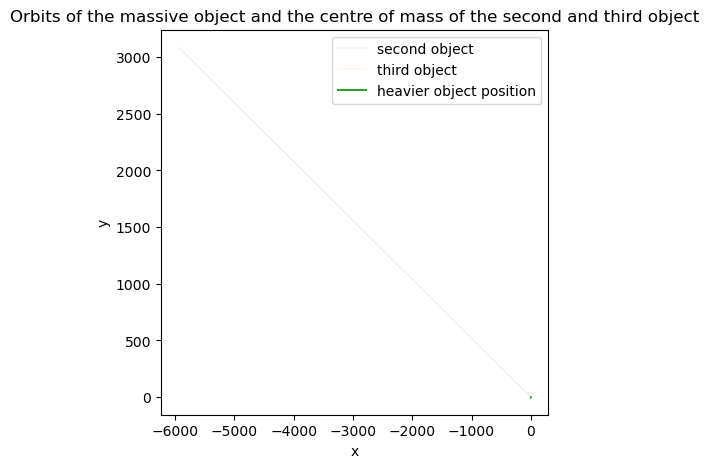

In [30]:
#Plotting the particle's paths and velocity 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.plot(Obj_2_r[:,0],Obj_2_r[:,1],label='second object ',lw=0.1)
ax.plot(Obj_3_r[:,0],Obj_3_r[:,1],label='third object ',lw=0.1)
ax.plot(Obj_1_r[:,0],Obj_1_r[:,1],label='heavier object position')
ax.set_title('Orbits of the massive object and the centre of mass of the second and third object')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
